# Land Slide Prediction Analysis

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

## Data Loading

In [5]:
df = pd.read_csv("landslide_dataset.csv")
df.head()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


## Preprocessing & Cleaning

In [8]:
print(df.isnull().sum())

df = df.dropna()

df = pd.get_dummies(df)

Rainfall_mm            0
Slope_Angle            0
Soil_Saturation        0
Vegetation_Cover       0
Earthquake_Activity    0
Proximity_to_Water     0
Landslide              0
Soil_Type_Gravel       0
Soil_Type_Sand         0
Soil_Type_Silt         0
dtype: int64


## Data Visualization

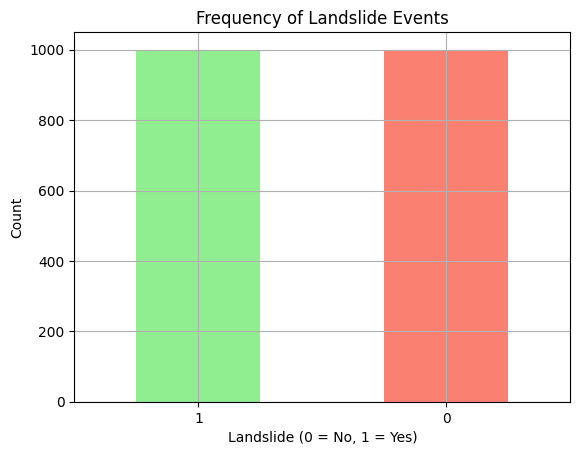

In [16]:
# Bar chart for the 'Landslide' column
df['Landslide'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Frequency of Landslide Events")
plt.xlabel("Landslide (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

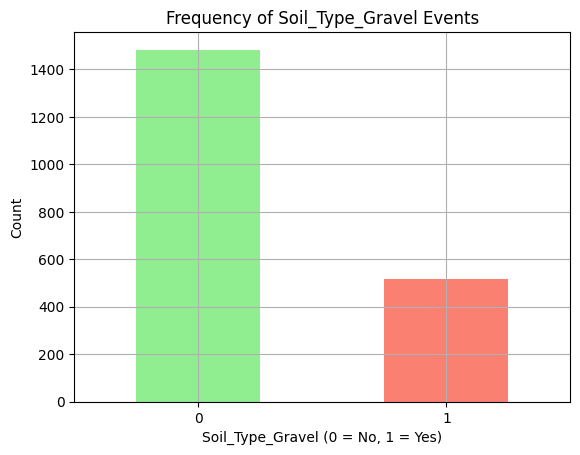

In [17]:
# Bar chart for the 'Soil_Type_Gravel' column
df['Soil_Type_Gravel'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Frequency of Soil_Type_Gravel Events")
plt.xlabel("Soil_Type_Gravel (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

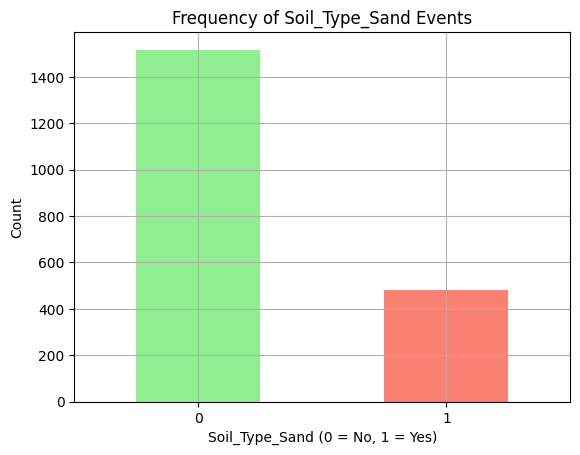

In [18]:
# Bar chart for the 'Soil_Type_Sand' column
df['Soil_Type_Sand'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Frequency of Soil_Type_Sand Events")
plt.xlabel("Soil_Type_Sand (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

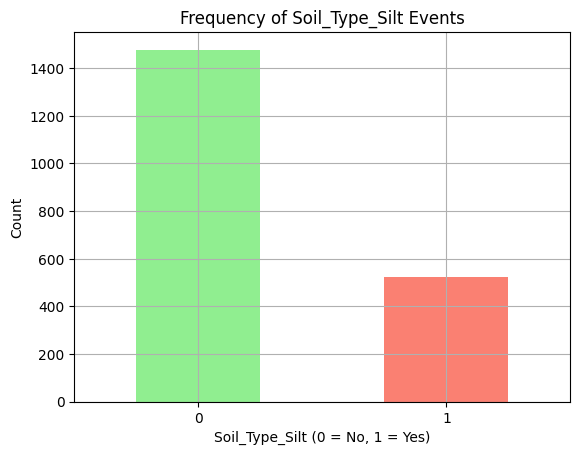

In [19]:
# Bar chart for the 'Soil_Type_Silt' column
df['Soil_Type_Silt'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Frequency of Soil_Type_Silt Events")
plt.xlabel("Soil_Type_Silt (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

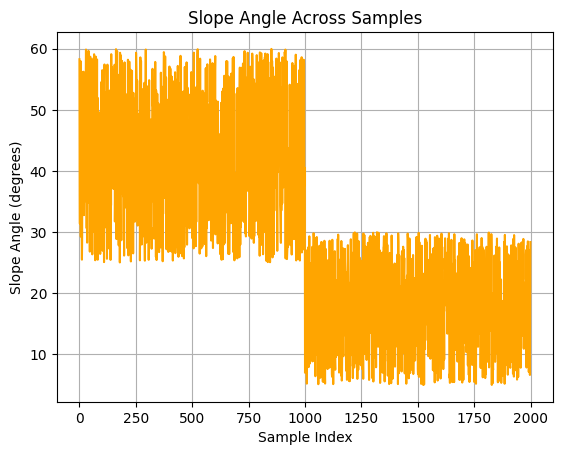

In [12]:
# Line chart of a real continuous feature: Slope_Angle
df['Slope_Angle'].plot(kind='line', color='orange')
plt.title("Slope Angle Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Slope Angle (degrees)")
plt.grid(True)
plt.show()

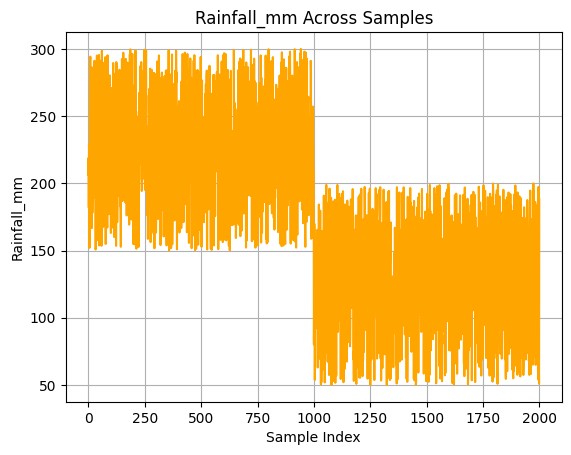

In [22]:
# Line chart of a real continuous feature: Rainfall_mm
df['Rainfall_mm'].plot(kind='line', color='orange')
plt.title("Rainfall_mm Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall_mm")
plt.grid(True)
plt.show()

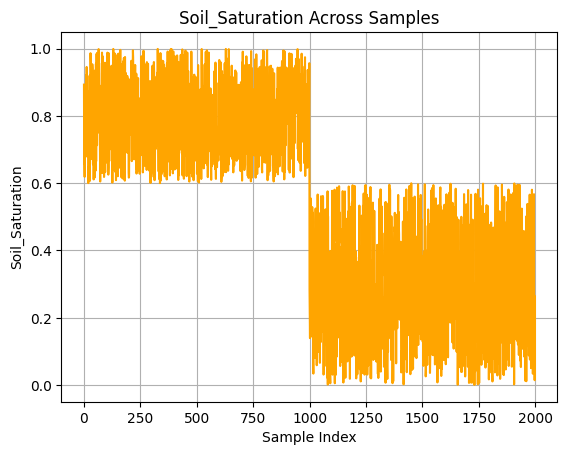

In [23]:
# Line chart of a real continuous feature: Soil_Saturation
df['Soil_Saturation'].plot(kind='line', color='orange')
plt.title("Soil_Saturation Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Soil_Saturation")
plt.grid(True)
plt.show()

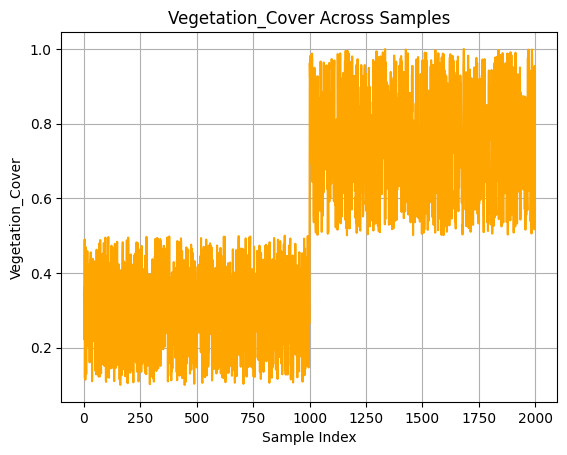

In [24]:
# Line chart of a real continuous feature: Vegetation_Cover
df['Vegetation_Cover'].plot(kind='line', color='orange')
plt.title("Vegetation_Cover Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Vegetation_Cover")
plt.grid(True)
plt.show()

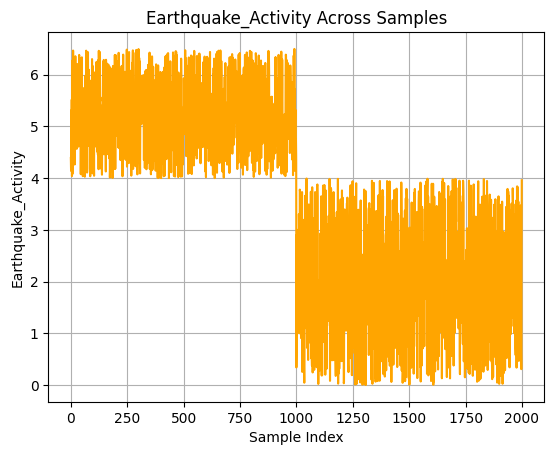

In [25]:
# Line chart of a real continuous feature: Earthquake_Activity
df['Earthquake_Activity'].plot(kind='line', color='orange')
plt.title("Earthquake_Activity Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Earthquake_Activity")
plt.grid(True)
plt.show()

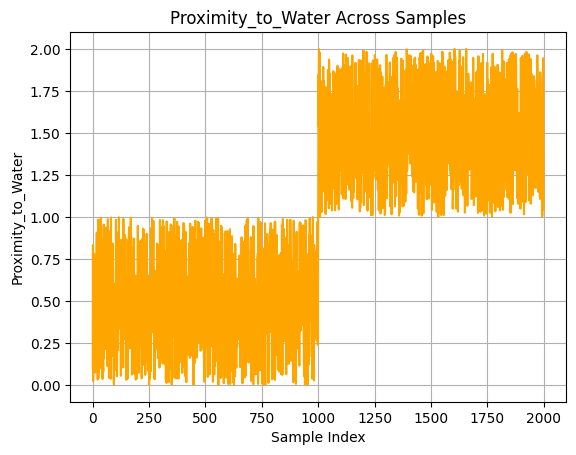

In [26]:
# Line chart of a real continuous feature: Proximity_to_Water
df['Proximity_to_Water'].plot(kind='line', color='orange')
plt.title("Proximity_to_Water Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Proximity_to_Water")
plt.grid(True)
plt.show()

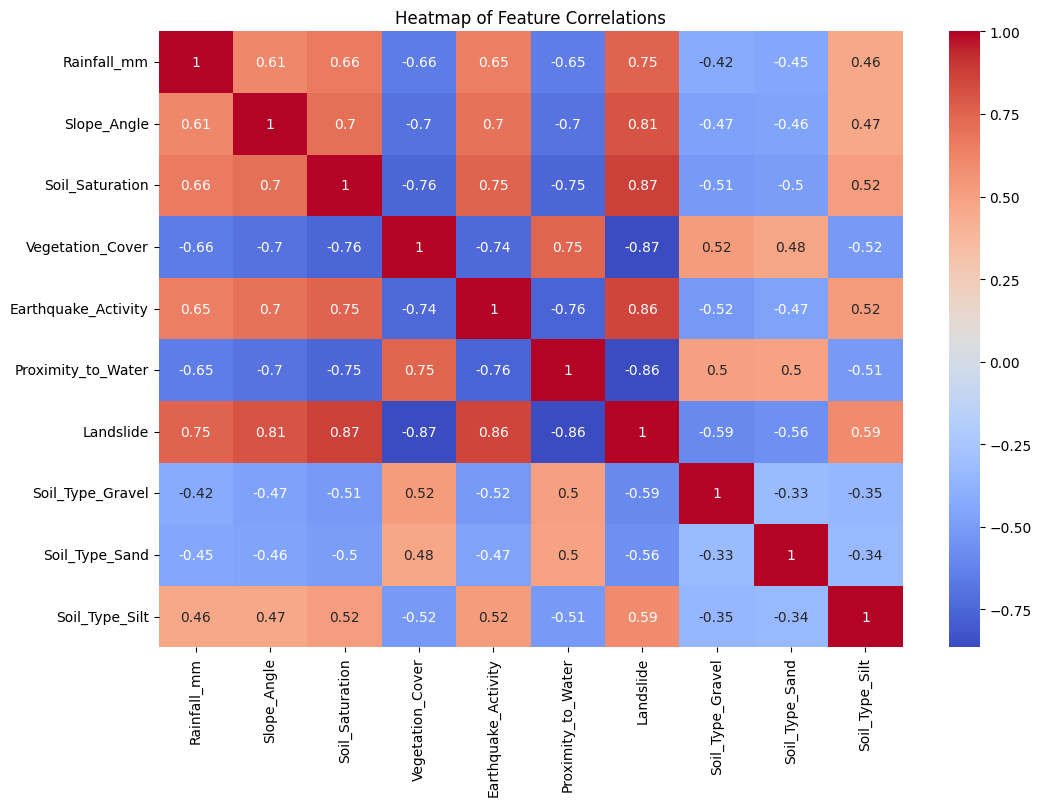

In [27]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Heatmap of Feature Correlations")
plt.show()

##  Model Building

In [29]:
X = df.drop("Landslide", axis=1)
y = df["Landslide"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### SVM

In [31]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

## Model Evaluation

### Random Forest

Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       199

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



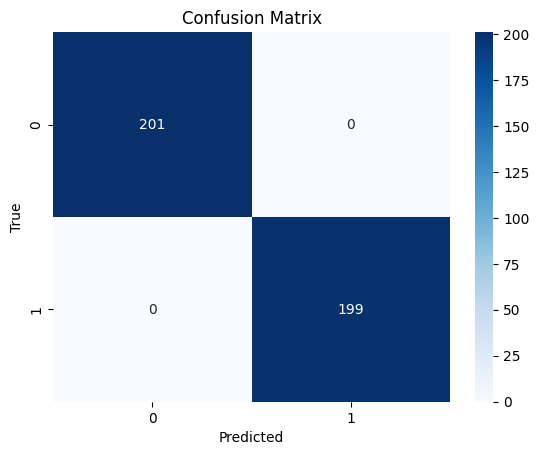

In [32]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### SVM

Accuracy: 0.955
F1 Score: 0.9549932484809083
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       201
           1       0.96      0.94      0.95       199

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



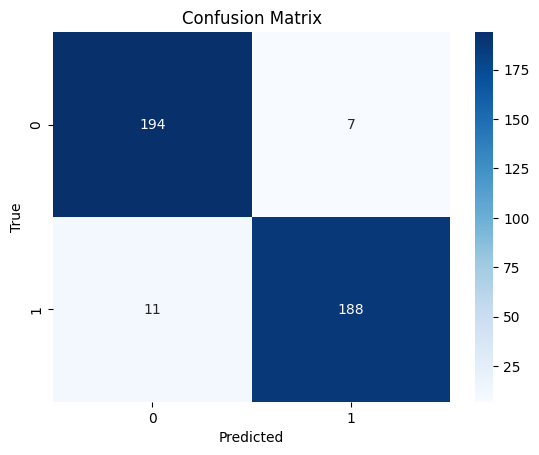

In [33]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()